<a href="https://colab.research.google.com/github/Foysal348/Heart-Disease-Prediction/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/heart.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


##Heart Disease Count by Sex

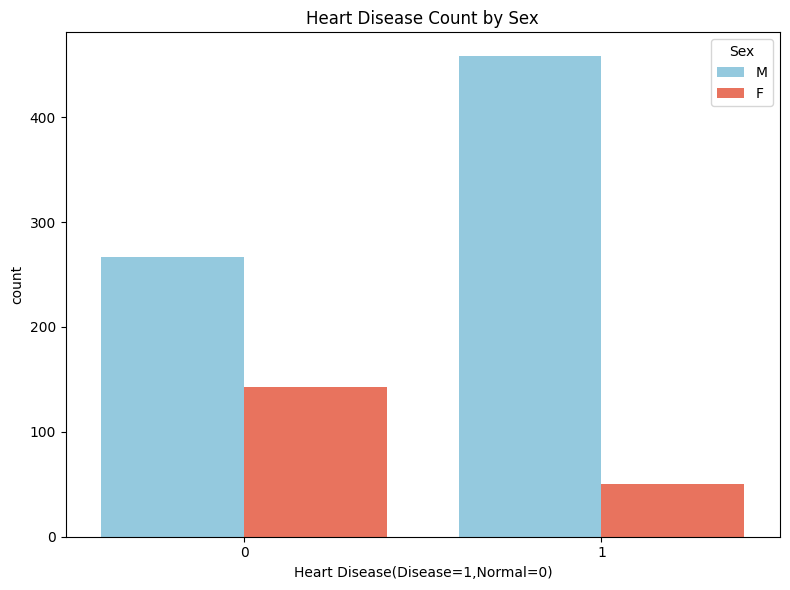

In [45]:
plt.figure(figsize=(8,6))
sns.countplot(x="HeartDisease",data=df,hue="Sex",palette=["skyblue", "tomato"])
plt.title("Heart Disease Count by Sex")
plt.xlabel("Heart Disease(Disease=1,Normal=0)")
plt.tight_layout()
plt.show()

## Numerical Feature Distibution

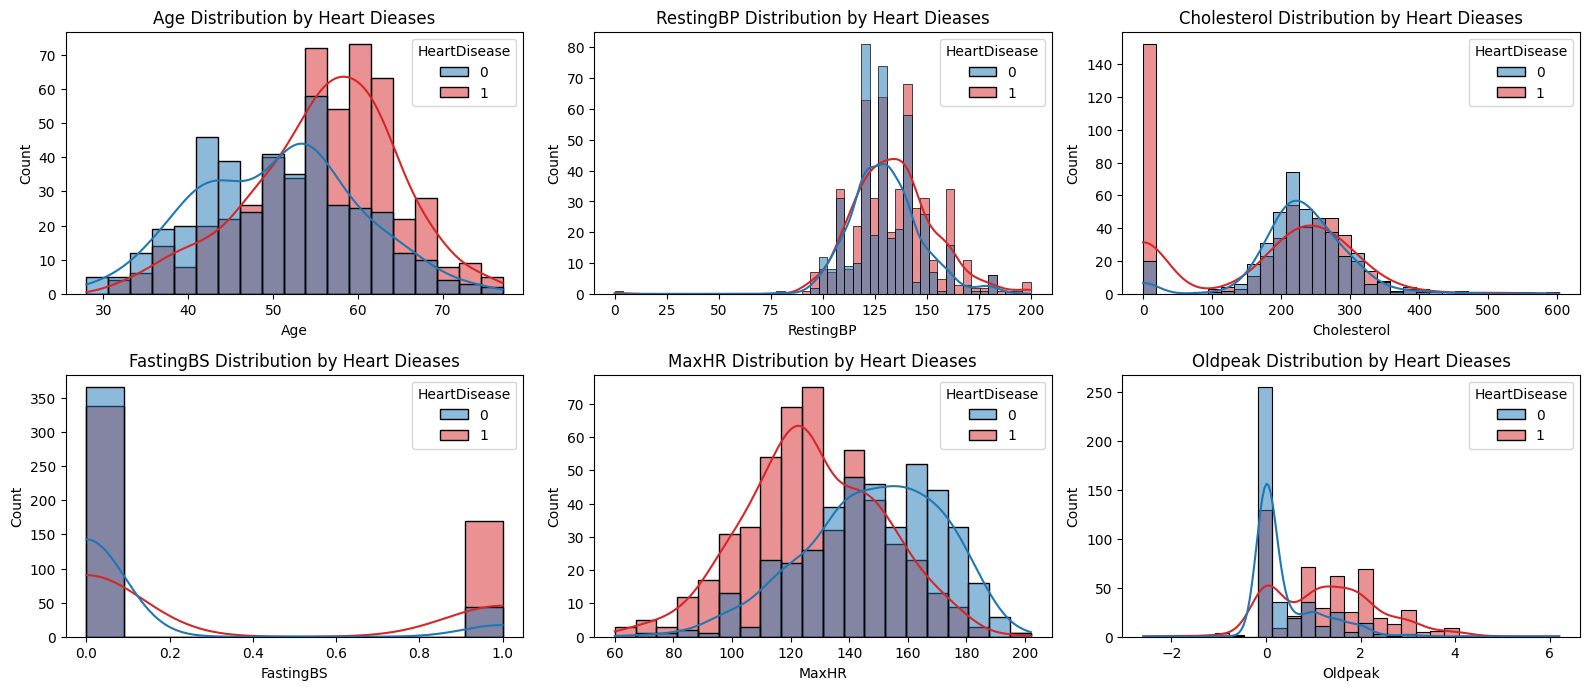

In [52]:
#numeric_features=df.select_dtypes(include=['int64','float64']).columns
numeric_features=['Age','RestingBP','Cholesterol','FastingBS','MaxHR','Oldpeak']
plt.figure(figsize=(16,10))
palette_colors = {
    0: "#1f77b4",   # soft blue
    1: "#d62728"    # soft red
}
for i,col in enumerate(numeric_features):
  plt.subplot(3,3,i+1)
  sns.histplot(data=df,x=col,kde=True,hue="HeartDisease",palette=palette_colors)
  plt.title(f"{col} Distribution by Heart Dieases")
plt.tight_layout()
plt.show()


## Categorical Features Distribution

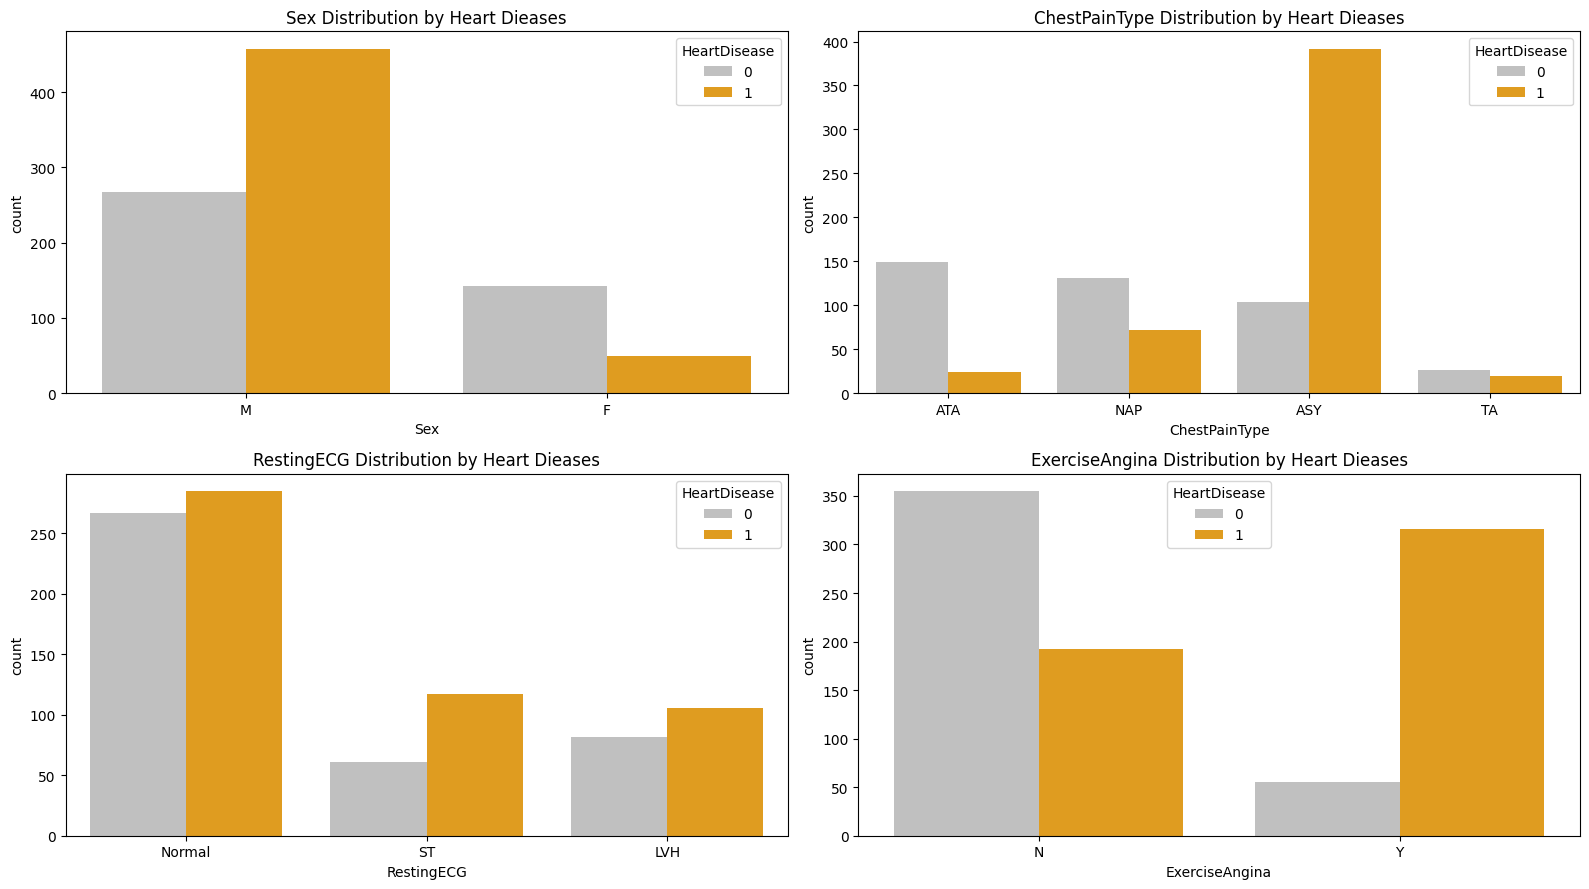

In [60]:
categorical_features=["Sex","ChestPainType","RestingECG","ExerciseAngina"]
plt.figure(figsize=(16,9))

for i,col in enumerate(categorical_features):
  plt.subplot(2,2,i+1)
  sns.countplot(data=df,x=col,hue="HeartDisease",palette=["silver","orange"])
  plt.title(f"{col} Distribution by Heart Dieases")
plt.tight_layout()
plt.show()



## Correlation Matrix (Heatmap)

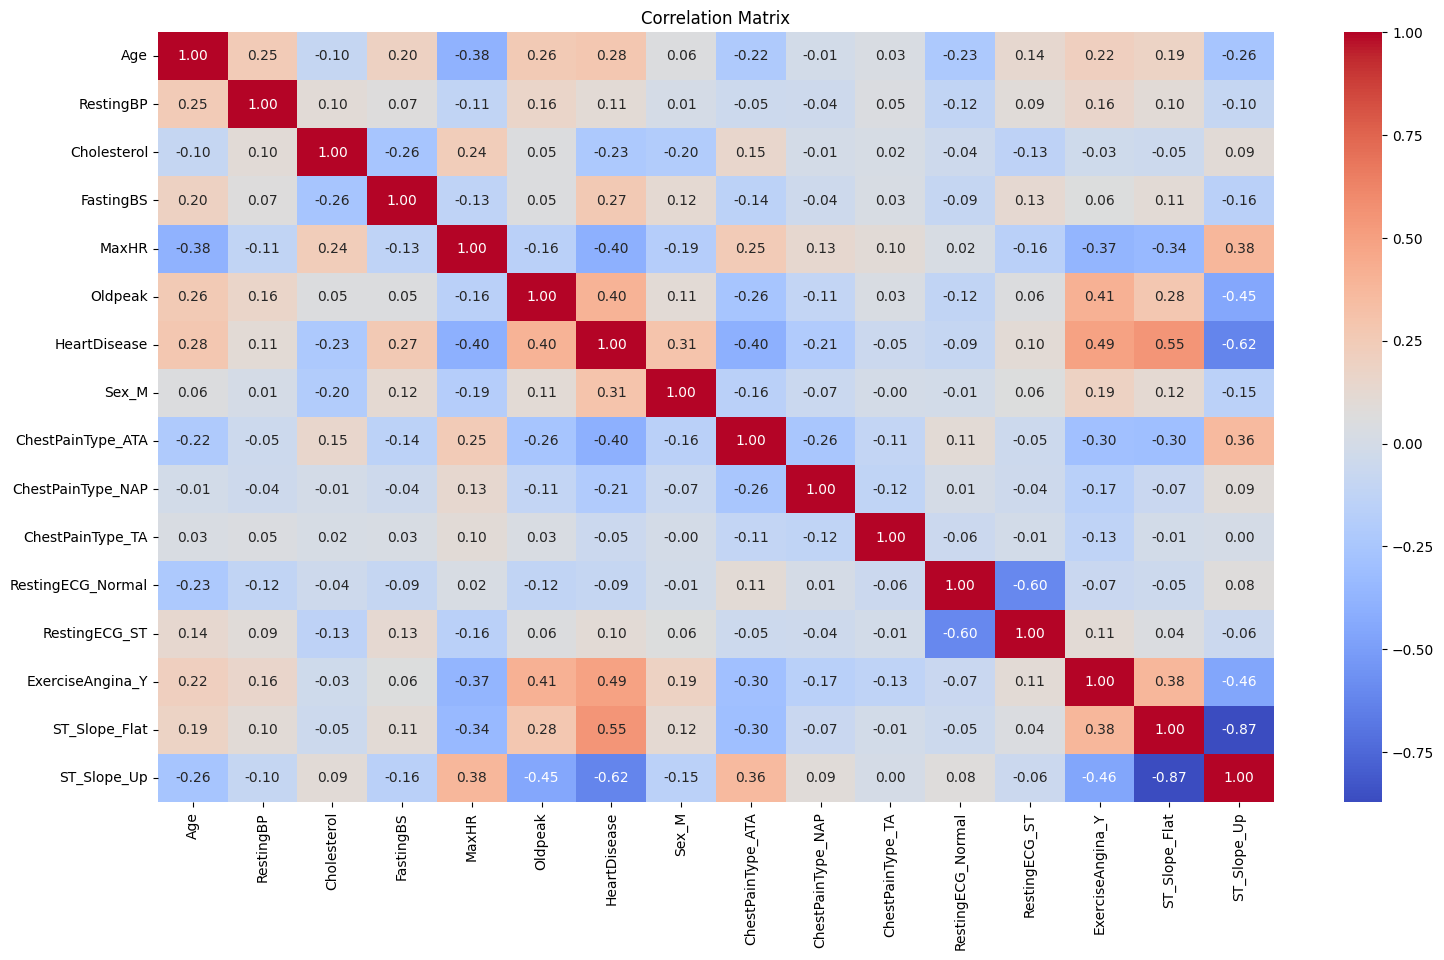

In [59]:
heatmap_data=pd.get_dummies(df,drop_first=True)
plt.figure(figsize=(18,10))
sns.heatmap(heatmap_data.corr(),annot=True,cmap="coolwarm",fmt='0.2f')
plt.title("Correlation Matrix")
plt.show()